In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [92]:
csv_file_path = 'outbreaks.csv'
outbreaks_df = pd.read_csv(csv_file_path)
outbreaks_df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [93]:
virus_df = outbreaks_df

In [94]:
virus_df = virus_df['Species'].dropna()
virus_df

3                Scombroid toxin
4            Salmonella enterica
5                Shigella boydii
7            Salmonella enterica
8                          Virus
                  ...           
19113    Clostridium perfringens
19114     Norovirus genogroup II
19115     Norovirus genogroup II
19116     Norovirus genogroup II
19117     Norovirus genogroup II
Name: Species, Length: 12500, dtype: object

In [95]:
outbreaks_df.count()

Year                 19119
Month                19119
State                19119
Location             16953
Food                 10156
Ingredient            1876
Species              12500
Serotype/Genotype     3907
Status               12500
Illnesses            19119
Hospitalizations     15494
Fatalities           15518
dtype: int64

In [96]:
virus_df.count()

12500

In [97]:
virus_df.value_counts() 

Norovirus genogroup I                                                                                                                   2744
Salmonella enterica                                                                                                                     2303
Norovirus genogroup II                                                                                                                  1424
Norovirus unknown                                                                                                                        790
Clostridium perfringens                                                                                                                  732
                                                                                                                                        ... 
Bacillus other                                                                                                                             1
Norovirus gen

In [98]:
virus_df = outbreaks_df.groupby('Species').filter(lambda x : len(x)>500)
virus_df = virus_df['Species'].value_counts()
virus_df

Norovirus genogroup I      2744
Salmonella enterica        2303
Norovirus genogroup II     1424
Norovirus unknown           790
Clostridium perfringens     732
Staphylococcus aureus       532
Name: Species, dtype: int64

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

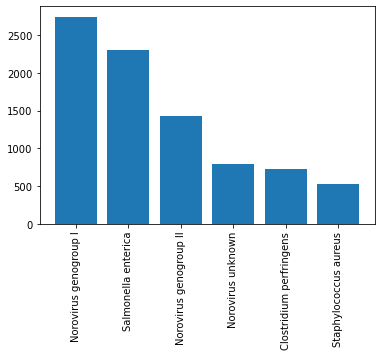

In [99]:
virus_series = virus_df
virus_frame = virus_series.to_frame()
virus_frame = virus_frame.head(20)
plt.bar(virus_frame.index, virus_frame["Species"])
plt.xticks(rotation='vertical')

In [100]:
food_df = outbreaks_df
food_df

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19114,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
19117,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0


In [101]:
food_df['Food'].count()

10156

In [102]:
food_df = food_df[['Food','Species']].dropna()
food_df

,Food,Species
3,"Fish, Ahi",Scombroid toxin
4,"Lasagna, Unspecified; Eggs, Other",Salmonella enterica
7,"Stuffing, Unspecified; Sandwich, Turkey",Salmonella enterica
8,"Salad, Unspecified",Virus
9,"Peppers, Chili",Virus
...,...,...
19105,Meal Replacement Powder,Salmonella enterica
19108,Foie Gras,Campylobacter unknown
19111,"Cookies, Chocolate Chip",Norovirus genogroup II
19113,"Gravy, Pork",Clostridium perfringens


In [103]:
food_df = outbreaks_df.groupby('Food').filter(lambda x : len(x)>100)
# food_df = outbreaks_df.groupby('Species').filter(lambda x : len(x) > 500)
food_df['Food'].value_counts()
# ['Multiple Foods', 'Oysters, Raw','Ground Beef, Hamburger','Salad, Unspecified','Chicken, Unspecified']

Multiple Foods            206
Oysters, Raw              165
Ground Beef, Hamburger    127
Salad, Unspecified        118
Chicken, Unspecified      105
Name: Food, dtype: int64

In [104]:
food_df['Species'].value_counts() 

Norovirus genogroup I                                                               136
Salmonella enterica                                                                  58
Vibrio parahaemolyticus                                                              54
Escherichia coli, Shiga toxin-producing                                              45
Norovirus genogroup II                                                               36
Norovirus unknown                                                                    27
Staphylococcus aureus                                                                18
Bacillus cereus; Clostridium perfringens                                             12
Norovirus                                                                            11
Virus                                                                                11
Clostridium perfringens                                                              10
Hepatitis A                     

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

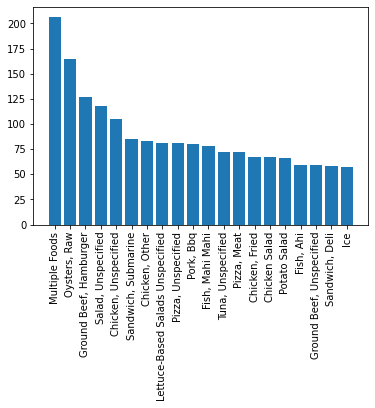

In [105]:
food_series = outbreaks_df['Food'].value_counts()
food_frame = food_series.to_frame()
food_frame = food_frame.head(20)
plt.bar(food_frame.index, food_frame["Food"])
plt.xticks(rotation='vertical')

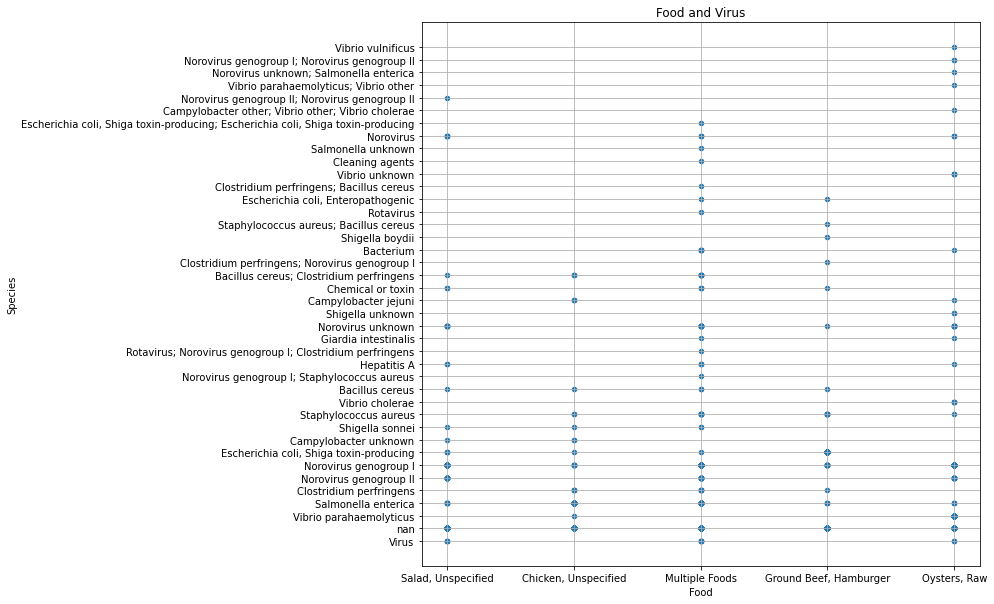

In [106]:
food_df = food_df.astype(str)
food_df.plot(kind="scatter", x='Food', y='Species', grid=True,figsize=(10,10), title="Food and Virus")
plt.show()

In [211]:
foodvirus = outbreaks_df

In [217]:
foodill = foodvirus.groupby('Species')['Illnesses']
# foodill = foodill['Species'].dropna()
#foodill = foodill.groupby('Species').filter(lambda x : len(x)>100)
foodill

In [219]:
foodill_data

,Food,Year,Month,State,Location,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,"Acai, Bananas, Strawberries, Sugar Cane Juice",1,1,1,1,0,1,0,1,1,1,1
1,"Ackawi Cheese, Pasteurized; Chives Cheese, Pas...",1,1,1,1,0,1,0,1,1,1,1
2,Alcohol,6,6,6,5,0,6,1,6,6,6,5
3,Alcohol; Water,1,1,1,0,1,1,1,1,1,1,1
4,Alfalfa Sprouts,24,24,24,15,6,23,22,23,24,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...
3122,"Yogurt, Unspecified",1,1,1,0,1,1,0,1,1,1,1
3123,Ziti & Meatballs; Water; Paella,1,1,1,1,0,1,0,1,1,1,1
3124,Zucchini,2,2,2,2,1,1,0,1,2,2,2
3125,"Zucchini, Marinated; Zucchini, Fried; Bruschet...",1,1,1,1,0,0,0,0,1,1,1


In [233]:
foodill_data.index

Index(['Norovirus genogroup I', 'Salmonella enterica',
       'Norovirus genogroup II', 'Clostridium perfringens',
       'Norovirus unknown', 'Escherichia coli, Shiga toxin-producing',
       'Staphylococcus aureus', 'Campylobacter jejuni', 'Shigella sonnei',
       'Norovirus'],
      dtype='object', name='Species')

In [237]:
foodill = outbreaks_df.groupby(["Food"]).sum()["Illnesses"].sort_values(ascending=False).to_frame().head(10)

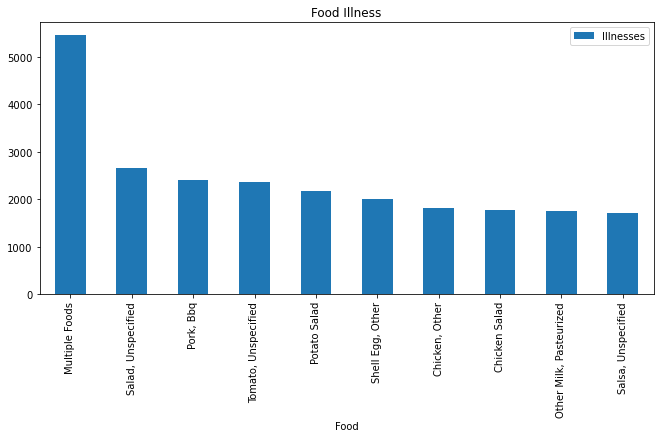

<Figure size 432x288 with 0 Axes>

In [238]:
foodill.plot(kind="bar", figsize=(11,5))

plt.title("Food Illness")
plt.show()
plt.tight_layout()